In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
from kRR_modified import KernelRidge
from sklearn import preprocessing
import sklearn as sk
from sklearn.preprocessing import StandardScaler

In [2]:
x_data = np.random.random((1000, 100))

In [3]:
x_data

array([[0.8906549 , 0.14460073, 0.0817553 , ..., 0.43869784, 0.08373948,
        0.31216403],
       [0.79403492, 0.63771946, 0.19095623, ..., 0.84314338, 0.52787372,
        0.67292942],
       [0.08024568, 0.78579846, 0.28620711, ..., 0.54854758, 0.48506301,
        0.08477802],
       ...,
       [0.14315454, 0.95254571, 0.42083896, ..., 0.80662009, 0.69635151,
        0.08409971],
       [0.04669356, 0.66766944, 0.36199591, ..., 0.21503736, 0.97648776,
        0.0747063 ],
       [0.68747997, 0.14170004, 0.73042787, ..., 0.79689462, 0.98353808,
        0.78774706]])

In [12]:
scaler = StandardScaler()

In [26]:
x_data = scaler.fit_transform(x_data)

In [29]:
n = 10#times
data = 1000
norm1 = np.zeros(n)
norm2 = np.zeros(n)
norm3 = np.zeros(n)

In [30]:
def random_generate(k):
    x_data = None
    y_label = None
    if k == 0:
        x_data = np.random.random((data, 100))
        y_label = np.random.random(data)
    elif k == 1:
        x_data = np.random.gamma(2,2,(data, 100))
        y_label = np.random.gamma(1,2,data)
    elif k == 2:
        x_data = np.random.normal(0,1,(data, 100))
        y_label = np.random.normal(0,1,data)
    x_data = scaler.fit_transform(x_data)
    return x_data, y_label

In [ ]:
for i in range(0,n):
    KRR = KernelRidge("gaussian")
    sim = 0
    # print(sim)
    x_data,y_label = random_generate(sim) #random.randint(0,2))
    # print(x_data)
    Kernel = KRR.compute_kernel_matrix(x_data, x_data)
    # np.linalg.matrix_rank(Kernel)
    # print(Kernel)
    K1 = 100
    K2 = 500
    K3 = 1000
    C1 = Kernel[:, :K1]
    W1 = C1[:K1, :]
    K1_approx = np.matmul(np.matmul(C1, np.linalg.pinv(W1)), C1.T)
    norm1[i] = np.linalg.norm(Kernel - K1_approx)
    print(K1_approx)
    C2 = Kernel[:, :K2]
    W2 = C2[:K2, :]
    K2_approx = np.matmul(np.matmul(C2, np.linalg.pinv(W2)), C2.T)
    norm2[i] = np.linalg.norm(Kernel - K2_approx)
    C3 = Kernel[:, :K3]
    W3 = C3[:K3, :]
    K3_approx = np.matmul(np.matmul(C3, np.linalg.pinv(W3)), C3.T)
    norm3[i] = np.linalg.norm(Kernel - K3_approx)

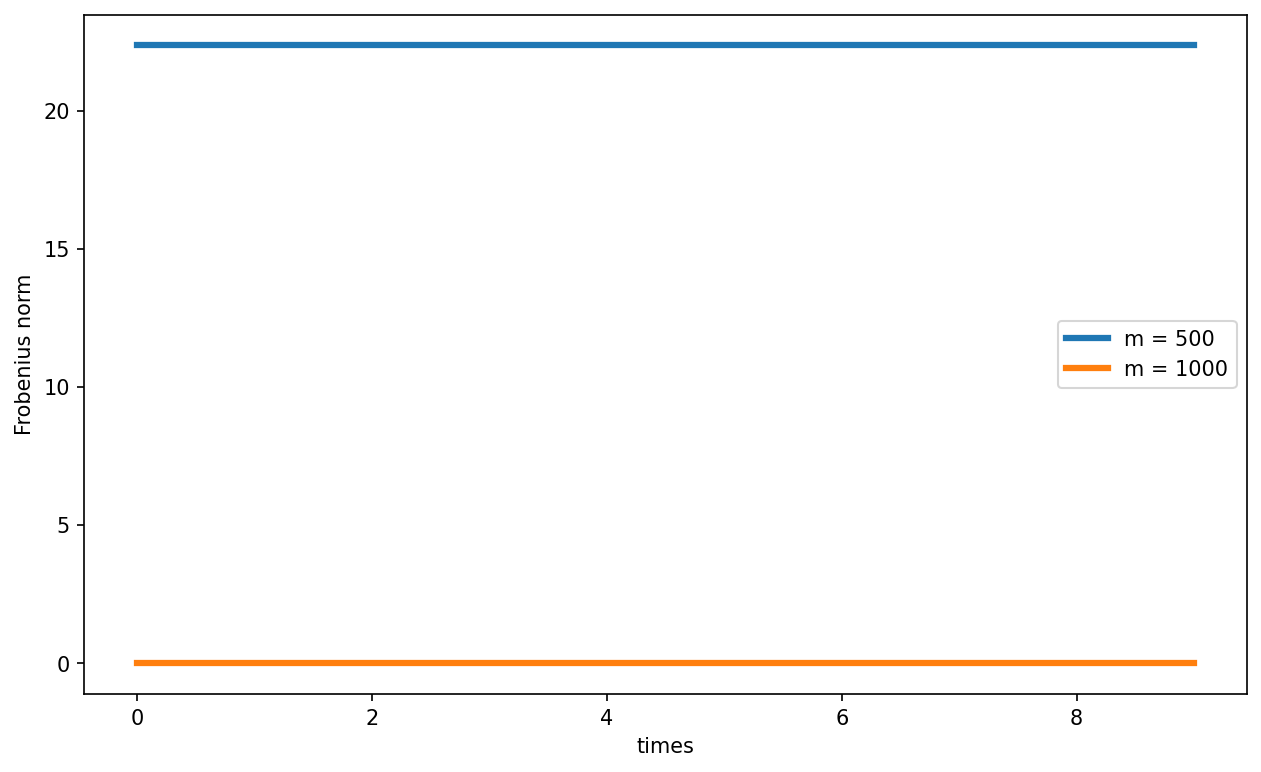

<Figure size 432x288 with 0 Axes>

In [34]:
fig = plt.figure(figsize = (10,6),dpi=150)
# plt.plot(norm1,label = "m = 100", lw = 3)
plt.plot(norm2,label = "m = 500", lw = 3)
plt.plot(norm3,label = "m = 1000",lw = 3)
plt.legend()
plt.xlabel("times")
plt.ylabel("Frobenius norm")
plt.show()
plt.savefig("nystroem_1000.png")